In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import pickle
from tqdm import tqdm

from pathlib import Path
from datetime import datetime

# 1. Chargement des données

In [2]:
DATA_PATH = 'data/raw/'

In [3]:
[print(x) for x in os.listdir(DATA_PATH)];

articles_embeddings.pickle
articles_metadata.csv
clicks
clicks_sample.csv


* **articles_metadata.csv** : Fichier avec des metadatas sur les articles
* **articles_embeddings.pickle** : Article Content Embeddings (250-dimensional vectors)
* **clicks** : Dossier avec des fichiers de clics pour chaque heure.
* **clicks_sample.csv** : Exemple de fichier de clics.

## 1.1. Fichier : article_metadata

In [4]:
articles_metadata = pd.read_csv(DATA_PATH +'articles_metadata.csv')  

### 1.1.1. 1er tour

In [5]:
articles_metadata.head()

article_id  category_id  created_at_ts  publisher_id  words_count
0           0            0  1513144419000             0          168
1           1            1  1405341936000             0          189
2           2            1  1408667706000             0          250
3           3            1  1408468313000             0          230
4           4            1  1407071171000             0          162

In [6]:
articles_metadata.sample(5)

article_id  category_id  created_at_ts  publisher_id  words_count
112895      112895          237  1448313063000             0          154
2631          2631            1  1510142362000             0          186
159976      159976          281  1512056042000             0          233
309581      309581          431  1475441070000             0          112
256482      256482          390  1508324952000             0          194

In [7]:
articles_metadata.tail()

article_id  category_id  created_at_ts  publisher_id  words_count
364042      364042          460  1434034118000             0          144
364043      364043          460  1434148472000             0          463
364044      364044          460  1457974279000             0          177
364045      364045          460  1515964737000             0          126
364046      364046          460  1505811330000             0          479

In [8]:
articles_metadata.describe()

article_id    category_id  created_at_ts  publisher_id  \
count  364047.000000  364047.000000   3.640470e+05      364047.0   
mean   182023.000000     283.108239   1.474070e+12           0.0   
std    105091.461061     136.723470   4.293038e+10           0.0   
min         0.000000       0.000000   1.159356e+12           0.0   
25%     91011.500000     199.000000   1.444925e+12           0.0   
50%    182023.000000     301.000000   1.489422e+12           0.0   
75%    273034.500000     399.000000   1.509891e+12           0.0   
max    364046.000000     460.000000   1.520943e+12           0.0   

         words_count  
count  364047.000000  
mean      190.897727  
std        59.502766  
min         0.000000  
25%       159.000000  
50%       186.000000  
75%       218.000000  
max      6690.000000

In [9]:
articles_metadata.shape

(364047, 5)

On a un jeu de données de 5 variables pour 364 047 articles.

Les 5 variables sont donc :

* **article_id**    : l'identifiant de l'article
* **category_id**   : l'identifiant de la catégorie
* **created_at_ts** : la date en millisecondes de la publication de l'article
* **publisher_id**  : l'identifiant de celui qui publie
* **words_cound**   : le nombre de mot de l'article

Observations :

* Il n'y a aucunes valeurs manquantes
* La colonne publisher_id est  vide
* les dates sont à reformater (timestamps Unix, qui correspondent au nombre de secondes écoulées depuis le 1er janvier 1970 à 00:00:00 UTC)
* Un article avec 0 mot ?


### 1.1.2. Premiers traitements

On peut supprimer la colonne publisher_id et reformater les dates

In [10]:
articles_metadata["created_at_ts"] = pd.to_datetime(articles_metadata["created_at_ts"], unit="ms")

Vérification de la première date

In [11]:
timestamp = 1513144419000
date = datetime.fromtimestamp(timestamp/1000.0)
print(date)

2017-12-13 06:53:39


In [12]:
articles_metadata.head(1)

article_id  category_id       created_at_ts  publisher_id  words_count
0           0            0 2017-12-13 05:53:39             0          168

In [13]:
articles_metadata.drop(columns=["publisher_id"], inplace=True)

In [14]:
articles_metadata.dtypes

article_id                int64
category_id               int64
created_at_ts    datetime64[ns]
words_count               int64
dtype: object

In [15]:
articles_metadata.head(5)

article_id  category_id       created_at_ts  words_count
0           0            0 2017-12-13 05:53:39          168
1           1            1 2014-07-14 12:45:36          189
2           2            1 2014-08-22 00:35:06          250
3           3            1 2014-08-19 17:11:53          230
4           4            1 2014-08-03 13:06:11          162

### 1.1.3. Variable "words_count"

In [16]:
print(articles_metadata[articles_metadata.words_count == 0].shape)
articles_metadata[articles_metadata.words_count == 0]

(35, 4)


article_id  category_id       created_at_ts  words_count
35491        35491           43 2016-08-04 09:42:02            0
38472        38472           51 2011-04-21 21:22:43            0
39043        39043           64 2014-06-30 20:02:35            0
39054        39054           64 2015-01-21 21:30:33            0
164414      164414          288 2015-03-30 08:30:23            0
206233      206233          331 2017-09-30 17:11:56            0
212323      212323          343 2010-04-19 10:36:16            0
212324      212324          343 2010-04-16 18:49:55            0
212327      212327          343 2014-08-11 20:23:05            0
212526      212526          347 2018-01-28 19:38:55            0
233934      233934          375 2017-10-05 13:44:16            0
236119      236119          375 2017-08-17 10:32:17            0
248114      248114          386 2018-01-28 00:36:21            0
275183      275183          408 2014-05-20 11:27:41            0
315386      315386          431 2015-01-14 10:19:35            0
315387      315387          431 2015-01-13 14:01:03            0
315388      315388          431 2015-01-14 11:27:14            0
315389      315389          431 2015-01-20 12:29:19            0
315390      315390          431 2015-01-14 11:51:29            0
315391      315391          431 2015-01-29 08:46:41            0
315392      315392          431 2015-01-23 10:19:51            0
315393      315393          431 2015-01-16 12:03:14            0
315394      315394          431 2015-02-02 10:00:27            0
315395      315395          431 2015-02-05 11:34:59            0
315396      315396          431 2015-02-06 09:02:47            0
315397      315397          431 2015-02-04 08:59:56            0
315398      315398          431 2015-02-04 09:59:18            0
315788      315788          431 2015-01-26 12:23:48            0
315789      315789          431 2015-01-09 09:08:09            0
315790      315790          431 2015-02-26 09:22:33            0
315791      315791          431 2015-02-09 09:00:04            0
315792      315792          431 2015-03-10 11:47:53            0
315793      315793          431 2015-03-10 12:00:20            0
328318      328318          436 2017-05-04 17:28:34            0
333154      333154          437 2017-06-30 15:53:47            0

35 articles sont indiqués comme vide, on peut penser que l'alimentation de la variable n'a pas fonctionné. On conserve les articles puisque cette variable n'est pas centrale.

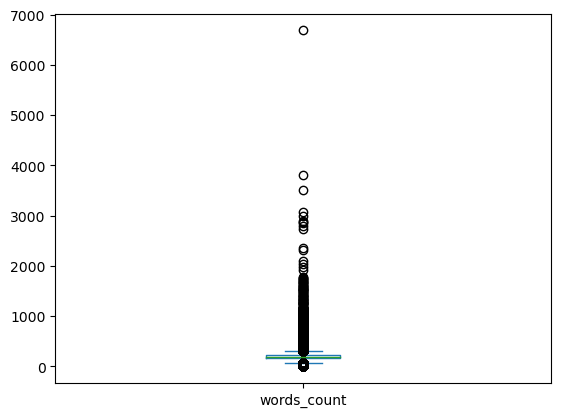

In [17]:
articles_metadata["words_count"].plot(kind="box")
plt.show()

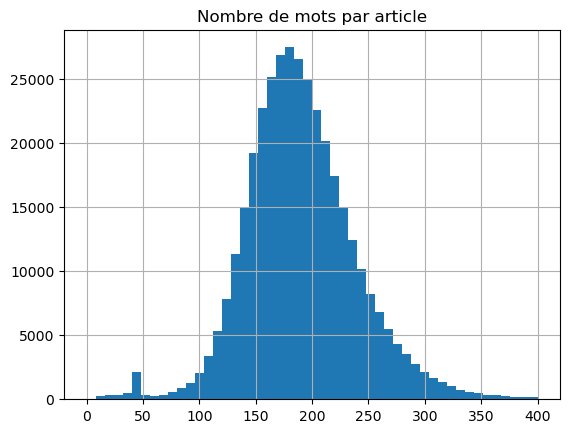

In [18]:
articles_metadata.words_count.hist(bins=50, range=(0,400))
plt.title('Nombre de mots par article');

### 1.1.4. Variable "created_at"

In [19]:
print("Date la plus ancienne :", articles_metadata["created_at_ts"].min())
print("Date la plus récente :", articles_metadata["created_at_ts"].max())
print("\n")

plt.hist(articles_metadata["created_at_ts"], bins=50)
plt.xlabel("Date de publication")
plt.ylabel("Nombre d'articles")
plt.show()

Date la plus ancienne : 2006-09-27 11:14:35
Date la plus récente : 2018-03-13 12:12:30




Assez peu d'articles avant 2013 et beaucoup à partir de 2017.

### 1.1.5. Variable category

In [20]:
category_counts = articles_metadata["category_id"].value_counts()
category_percent = articles_metadata["category_id"].value_counts(normalize=True)

Top 20 des catégories

In [21]:
category_percent[:20]

281    0.035207
375    0.027483
399    0.024857
412    0.023755
431    0.021313
428    0.021236
26     0.020170
7      0.018476
299    0.018223
301    0.017707
228    0.017638
442    0.016789
437    0.016528
118    0.015525
209    0.015424
354    0.015097
6      0.014328
136    0.014234
455    0.014114
174    0.013921
Name: category_id, dtype: float64

Environ 50 catégories correspondant à un seul article :

In [22]:
category_counts[-50:]

112    2
346    2
425    1
35     1
427    1
5      1
451    1
248    1
108    1
419    1
321    1
155    1
159    1
181    1
183    1
294    1
293    1
292    1
189    1
283    1
282    1
275    1
206    1
217    1
261    1
227    1
232    1
236    1
154    1
324    1
416    1
144    1
50     1
57     1
394    1
73     1
75     1
78     1
383    1
86     1
98     1
100    1
358    1
356    1
113    1
341    1
121    1
335    1
131    1
0      1
Name: category_id, dtype: int64

### 1.1.5. Valeurs manquantes

In [23]:
articles_metadata.isnull().sum()

article_id       0
category_id      0
created_at_ts    0
words_count      0
dtype: int64

### 1.1.6. Valeurs dupliquées

Sur l'identifiant, pas de duplication.

In [24]:
articles_metadata[articles_metadata.duplicated(subset=['article_id'])]

Empty DataFrame
Columns: [article_id, category_id, created_at_ts, words_count]
Index: []

Maintenant regardons si des articles de la même catégorie ont été publiés en même temps avec un même nombre de mots :

In [25]:
duplicated_subset = ['category_id', 'created_at_ts', 'words_count']

In [26]:
articles_metadata[articles_metadata.duplicated(subset=duplicated_subset, keep=False)]

article_id  category_id       created_at_ts  words_count
72668        72668          137 2017-11-05 08:00:02          148
72670        72670          137 2017-11-05 08:00:02          148
315523      315523          431 2015-01-29 00:00:01          204
315524      315524          431 2015-01-29 00:00:01          204
315618      315618          431 2015-02-04 00:00:01          208
315619      315619          431 2015-02-04 00:00:01          208
315854      315854          431 2015-02-14 00:00:02          214
315856      315856          431 2015-02-14 00:00:02          214
315859      315859          431 2015-02-17 01:00:02          193
315860      315860          431 2015-02-17 01:00:02          193
315917      315917          431 2015-03-10 00:00:03          224
315918      315918          431 2015-03-10 00:00:03          224

Les identifiants sont égalements très proches, soit deux nombres consécutifs, soit un nombre entre les deux.  
Les articles insérés entre deux duplicats à suivre :

In [27]:
articles_metadata.iloc[72669]

article_id                     72669
category_id                      137
created_at_ts    2017-11-19 07:50:02
words_count                      160
Name: 72669, dtype: object

In [28]:
articles_metadata.iloc[315855]

article_id                    315855
category_id                      431
created_at_ts    2015-02-14 00:00:02
words_count                      227
Name: 315855, dtype: object

Le nombre d'articles dupliqués ne semblent pas très important. On peut les supprimer sans pertes d'informations.  
On conservera le second duplicat dans l'hypothèse que l'article a été publié deux fois et qu'une modification légère a pu être appliquée.

In [29]:
duplicated_id = articles_metadata[articles_metadata.duplicated(subset=duplicated_subset, keep='last')]
duplicated_id

article_id  category_id       created_at_ts  words_count
72668        72668          137 2017-11-05 08:00:02          148
315523      315523          431 2015-01-29 00:00:01          204
315618      315618          431 2015-02-04 00:00:01          208
315854      315854          431 2015-02-14 00:00:02          214
315859      315859          431 2015-02-17 01:00:02          193
315917      315917          431 2015-03-10 00:00:03          224

In [30]:
# articles_metadata.drop_duplicates(subset=duplicated_subset, keep='last', inplace=True)

In [31]:
articles_metadata

article_id  category_id       created_at_ts  words_count
0                0            0 2017-12-13 05:53:39          168
1                1            1 2014-07-14 12:45:36          189
2                2            1 2014-08-22 00:35:06          250
3                3            1 2014-08-19 17:11:53          230
4                4            1 2014-08-03 13:06:11          162
...            ...          ...                 ...          ...
364042      364042          460 2015-06-11 14:48:38          144
364043      364043          460 2015-06-12 22:34:32          463
364044      364044          460 2016-03-14 16:51:19          177
364045      364045          460 2018-01-14 21:18:57          126
364046      364046          460 2017-09-19 08:55:30          479

[364047 rows x 4 columns]

<Axes: title={'center': 'Distribution of categories counts'}>

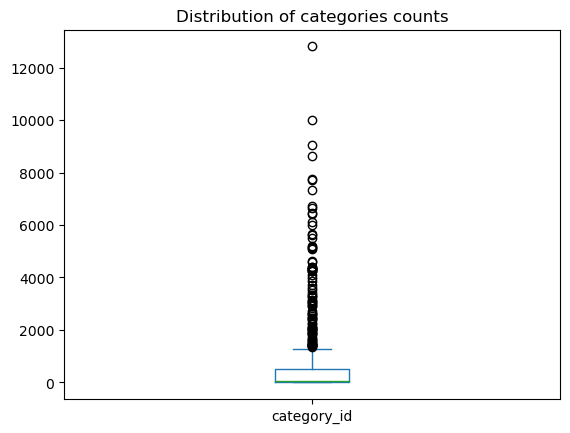

In [32]:
articles_metadata["category_id"].value_counts().plot(
    kind="box",
    x="category_id",
    title="Distribution of categories counts",
)

<Axes: title={'center': 'Distribution of categories'}>

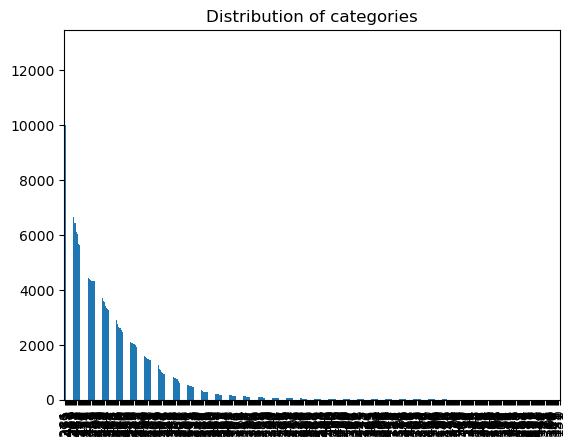

In [33]:
articles_metadata["category_id"].value_counts().plot(
    kind="bar",
    title="Distribution of categories",
)

In [34]:
articles_metadata["category_id"]

0           0
1           1
2           1
3           1
4           1
         ... 
364042    460
364043    460
364044    460
364045    460
364046    460
Name: category_id, Length: 364047, dtype: int64

## 1.2. Embedding

L'embedding doit correspondre aux articles présents dans articles_metadata. On a bien une ligne par article avec en colonne 250 mots.

In [35]:
NUM_EMBEDDINGS = 250
embeddings_df = pd.DataFrame(
    pd.read_pickle(Path(DATA_PATH, "articles_embeddings.pickle")),
    columns=["embedding_" + str(i) for i in range(NUM_EMBEDDINGS)],
    index=articles_metadata['article_id']
)

In [36]:
embeddings_df

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
article_id                                                                    
0             -0.161183    -0.957233    -0.137944     0.050855     0.830055   
1             -0.523216    -0.974058     0.738608     0.155234     0.626294   
2             -0.619619    -0.972960    -0.207360    -0.128861     0.044748   
3             -0.740843    -0.975749     0.391698     0.641738    -0.268645   
4             -0.279052    -0.972315     0.685374     0.113056     0.238315   
...                 ...          ...          ...          ...          ...   
364042        -0.055038    -0.962136     0.869436    -0.071523    -0.725294   
364043        -0.136932    -0.995471     0.991298     0.031871    -0.915622   
364044        -0.251390    -0.976243     0.586097     0.643631    -0.663359   
364045         0.224342    -0.923288    -0.381742     0.687890    -0.773911   
364046        -0.257134    -0.994631     0.983792    -0.190975    -0.953720   

            embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  \
article_id                                                                    
0              0.901365    -0.335148    -0.559561    -0.500603     0.165183   
1              0.485297    -0.715657    -0.897996    -0.359747     0.398246   
2             -0.387535    -0.730477    -0.066126    -0.754899    -0.242004   
3              0.191745    -0.825593    -0.710591    -0.040099    -0.110514   
4              0.271913    -0.568816     0.341194    -0.600554    -0.125644   
...                 ...          ...          ...          ...          ...   
364042         0.434320     0.198312    -0.581154     0.702346    -0.124813   
364043        -0.658517     0.633090    -0.564356     0.676551    -0.446068   
364044        -0.093480     0.691553    -0.588281     0.902999     0.124571   
364045        -0.103629    -0.406486     0.246004     0.255191    -0.329587   
364046        -0.893823     0.708974    -0.557027     0.846842    -0.118519   

            ...  embedding_240  embedding_241  embedding_242  embedding_243  \
article_id  ...                                                               
0           ...       0.321248       0.313999       0.636412       0.169179   
1           ...      -0.487843       0.823124       0.412688      -0.338654   
2           ...       0.454756       0.473184       0.377866      -0.863887   
3           ...       0.271535       0.036040       0.480029      -0.763173   
4           ...       0.238286       0.809268       0.427521      -0.615932   
...         ...            ...            ...            ...            ...   
364042      ...      -0.410549       0.564252      -0.463959       0.167907   
364043      ...      -0.681986      -0.574185      -0.536908       0.688934   
364044      ...      -0.162220      -0.242030      -0.476131       0.352132   
364045      ...      -0.422999       0.390324       0.655911      -0.646753   
364046      ...      -0.490481      -0.689666      -0.661846       0.490945   

            embedding_244  embedding_245  embedding_246  embedding_247  \
article_id                                                               
0                0.540524      -0.813182       0.286870      -0.231686   
1                0.320787       0.588643      -0.594137       0.182828   
2               -0.383365       0.137721      -0.810877      -0.447580   
3                0.022627       0.565165      -0.910286      -0.537838   
4               -0.503697       0.614450      -0.917760      -0.424061   
...                   ...            ...            ...            ...   
364042          -0.480068       0.652090       0.380880       0.433195   
364043           0.528204       0.162435       0.940364       0.989298   
364044          -0.311279       0.460574      -0.653077      -0.143725   
364045          -0.174031       0.698037      -0.317102       0.687132   
364046           0.736525       0.667668

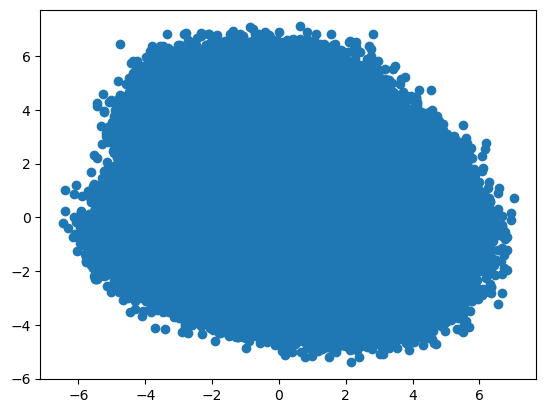

In [37]:
# Utiliser la PCA pour réduire la dimensionnalité des embeddings à deux dimensions et visualiser les points
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_df)

plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
plt.show()

## 1.3. Dossier "clicks"

In [38]:
CLICK_FILES_PATH = DATA_PATH + "clicks/clicks/"

#Get all .csv contain in clicks folder
click_files = [CLICK_FILES_PATH + x for x in os.listdir(CLICK_FILES_PATH)];

#Sort all files PATH contain in list.
click_files.sort()

In [39]:
print("Nombre de fichier : ", len(click_files))

Nombre de fichier :  385


### 1.3.1. Un fichier

In [40]:
clicks_hour_000 = pd.read_csv(CLICK_FILES_PATH + 'clicks_hour_000.csv')  

In [41]:
clicks_hour_000.dtypes

user_id                int64
session_id             int64
session_start          int64
session_size           int64
click_article_id       int64
click_timestamp        int64
click_environment      int64
click_deviceGroup      int64
click_os               int64
click_country          int64
click_region           int64
click_referrer_type    int64
dtype: object

In [42]:
clicks_hour_000.head()

user_id        session_id  session_start  session_size  click_article_id  \
0        0  1506825423271737  1506825423000             2            157541   
1        0  1506825423271737  1506825423000             2             68866   
2        1  1506825426267738  1506825426000             2            235840   
3        1  1506825426267738  1506825426000             2             96663   
4        2  1506825435299739  1506825435000             2            119592   

   click_timestamp  click_environment  click_deviceGroup  click_os  \
0    1506826828020                  4                  3        20   
1    1506826858020                  4                  3        20   
2    1506827017951                  4                  1        17   
3    1506827047951                  4                  1        17   
4    1506827090575                  4                  1        17   

   click_country  click_region  click_referrer_type  
0              1            20                    2  
1              1            20                    2  
2              1            16                    2  
3              1            16                    2  
4              1            24                    2

In [43]:
clicks_hour_000.tail()

user_id        session_id  session_start  session_size  \
1878      705  1506828968165442  1506828968000             2   
1879      705  1506828968165442  1506828968000             2   
1880      706  1506828979881443  1506828979000             3   
1881      706  1506828979881443  1506828979000             3   
1882      706  1506828979881443  1506828979000             3   

      click_article_id  click_timestamp  click_environment  click_deviceGroup  \
1878            119592    1506830912301                  4                  1   
1879            284847    1506830942301                  4                  1   
1880            108854    1506829027334                  4                  3   
1881             96663    1506829095732                  4                  3   
1882             68866    1506829125732                  4                  3   

      click_os  click_country  click_region  click_referrer_type  
1878        17              1            21                    2  
1879        17              1            21                    2  
1880         2              1            25                    1  
1881         2              1            25                    1  
1882         2              1            25                    1

In [44]:
clicks_hour_000.describe()

user_id    session_id  session_start  session_size  \
count  1883.000000  1.883000e+03   1.883000e+03   1883.000000   
mean    355.893787  1.506828e+15   1.506828e+12      3.459904   
std     206.162865  8.679628e+08   8.679468e+05      3.037467   
min       0.000000  1.506825e+15   1.506825e+12      2.000000   
25%     181.500000  1.506827e+15   1.506827e+12      2.000000   
50%     353.000000  1.506828e+15   1.506828e+12      3.000000   
75%     537.000000  1.506828e+15   1.506828e+12      4.000000   
max     706.000000  1.506829e+15   1.506829e+12     24.000000   

       click_article_id  click_timestamp  click_environment  \
count       1883.000000     1.883000e+03        1883.000000   
mean      176717.848646     1.506830e+12           3.917153   
std        82324.177259     1.064938e+07           0.410461   
min         2137.000000     1.506827e+12           1.000000   
25%       108854.000000     1.506828e+12           4.000000   
50%       157541.000000     1.506828e+12           4.000000   
75%       236697.500000     1.506829e+12           4.000000   
max       363291.000000     1.506998e+12           4.000000   

       click_deviceGroup     click_os  click_country  click_region  \
count        1883.000000  1883.000000    1883.000000   1883.000000   
mean            2.305895    12.113648       1.491768     18.774827   
std             1.062301     7.825735       2.007772      7.083400   
min             1.000000     2.000000       1.000000      1.000000   
25%             1.000000     2.000000       1.000000     13.000000   
50%             3.000000    17.000000       1.000000     21.000000   
75%             3.000000    19.000000       1.000000     25.000000   
max             4.000000    20.000000      11.000000     28.000000   

       click_referrer_type  
count          1883.000000  
mean              1.764206  
std               1.225679  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               2.000000  
max               7.000000

Explication des colonnes :

* **click_timestamp** : date du clic 
* **user_id** : identifiant de l'utilisateur
* **session_id** : identifiant de la session utilisateur
* **session_start** : date de début de la session
* **session_size** : nombre de clic au cours de la session
* **click_article_id** : identifiant de l'article cliqué
* **click_environment** : Id of the Environment: 1 - Facebook Instant Article, 2 - Mobile App, 3 - AMP (Accelerated Mobile Pages), 4 - Web
* **click_deviceGroup** : Id of the Device Type: 1 - Tablet, 2 - TV, 3 - Empty, 4 - Mobile, 5 - Desktop
* **click_os** : système d'exploitation de l'appareil (1 à 20) : 1 - Other, 2 - iOS, 3 - Android, 4 - Windows Phone, 5 - Windows Mobile, 6 - Windows, 7 - etc 
* **click_country** : Le pays de provenance de l'utilisateur
* **click_region** : 
* **click_referrer_type** : 

# 2. Construction du jeu de données

On se limite à 20 fichiers pour l'instant

In [45]:
NUM_CLICK_FILES = 20

In [46]:
selected_click_files = click_files[:NUM_CLICK_FILES]
selected_click_files

['data/raw/clicks/clicks/clicks_hour_000.csv',
 'data/raw/clicks/clicks/clicks_hour_001.csv',
 'data/raw/clicks/clicks/clicks_hour_002.csv',
 'data/raw/clicks/clicks/clicks_hour_003.csv',
 'data/raw/clicks/clicks/clicks_hour_004.csv',
 'data/raw/clicks/clicks/clicks_hour_005.csv',
 'data/raw/clicks/clicks/clicks_hour_006.csv',
 'data/raw/clicks/clicks/clicks_hour_007.csv',
 'data/raw/clicks/clicks/clicks_hour_008.csv',
 'data/raw/clicks/clicks/clicks_hour_009.csv',
 'data/raw/clicks/clicks/clicks_hour_010.csv',
 'data/raw/clicks/clicks/clicks_hour_011.csv',
 'data/raw/clicks/clicks/clicks_hour_012.csv',
 'data/raw/clicks/clicks/clicks_hour_013.csv',
 'data/raw/clicks/clicks/clicks_hour_014.csv',
 'data/raw/clicks/clicks/clicks_hour_015.csv',
 'data/raw/clicks/clicks/clicks_hour_016.csv',
 'data/raw/clicks/clicks/clicks_hour_017.csv',
 'data/raw/clicks/clicks/clicks_hour_018.csv',
 'data/raw/clicks/clicks/clicks_hour_019.csv']

In [47]:
clicks = pd.concat(
    [
        pd.read_csv(
            click_file_path,
            parse_dates=["session_start", "click_timestamp"],
            date_parser=lambda x: datetime.fromtimestamp(int(int(x) / 1000)),
        )
        for click_file_path in tqdm(selected_click_files)
    ],
    sort=False,
    ignore_index=True,
    verify_integrity=True,
)

100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


In [48]:
clicks.isnull().sum()

user_id                0
session_id             0
session_start          0
session_size           0
click_article_id       0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
dtype: int64

## 2.1. Type de variables

In [49]:
clicks.dtypes

user_id                         int64
session_id                      int64
session_start          datetime64[ns]
session_size                    int64
click_article_id                int64
click_timestamp        datetime64[ns]
click_environment               int64
click_deviceGroup               int64
click_os                        int64
click_country                   int64
click_region                    int64
click_referrer_type             int64
dtype: object

In [50]:
articles_metadata.dtypes

article_id                int64
category_id               int64
created_at_ts    datetime64[ns]
words_count               int64
dtype: object

In [51]:
articles_metadata.shape

(364047, 4)

## 2.2. Filtrer les users

On filtre les utilisateurs avec trop peu d'interactions

In [52]:
list_users_id = clicks.user_id.unique()
print("Le nombre d'utilisateurs est de :", len(list_users_id))

Le nombre d'utilisateurs est de : 27911


In [53]:
clicks.user_id.value_counts()[clicks.user_id.value_counts()>=5]

5890     68
9261     51
15275    45
681      36
852      33
         ..
594       5
2517      5
1572      5
624       5
23295     5
Name: user_id, Length: 3169, dtype: int64

In [54]:
users_with_5_interactions = pd.DataFrame(clicks.user_id.value_counts()[clicks.user_id.value_counts()>=5].index, columns=['user_id'])

In [55]:
filtered_users_ids = clicks.user_id.value_counts()[clicks.user_id.value_counts()>=5].index
print("Le nombre d'utilisateurs avec 5 interactions ou plus :", len(filtered_users_ids))

Le nombre d'utilisateurs avec 5 interactions ou plus : 3169


In [56]:
print("Nombre d'intercations totales:", len(clicks))

Nombre d'intercations totales: 81245


In [57]:
filtered_clicks_5 = clicks.merge(users_with_5_interactions, how = 'right', left_on = 'user_id', right_on = 'user_id')

In [58]:
print("Nombre d'interactions avec les utilisateurs avec plus de 5 interactions: ", len(filtered_clicks_5))

Nombre d'interactions avec les utilisateurs avec plus de 5 interactions:  21731


In [59]:
filtered_clicks_5.rename(columns={'click_article_id': 'article_id'}, inplace=True)

#### Vérification

In [60]:
filtered_clicks_5.user_id.value_counts()

5890     68
9261     51
15275    45
681      36
852      33
         ..
20554     5
10249     5
20665     5
3395      5
23295     5
Name: user_id, Length: 3169, dtype: int64

## 2.3. Fichier interactions

In [61]:
filtered_clicks_5['click'] = 1

In [62]:
filtered_clicks_5

user_id        session_id       session_start  session_size  \
0         5890  1506857592200716 2017-10-01 13:33:12             6   
1         5890  1506857592200716 2017-10-01 13:33:12             6   
2         5890  1506857592200716 2017-10-01 13:33:12             6   
3         5890  1506857592200716 2017-10-01 13:33:12             6   
4         5890  1506857592200716 2017-10-01 13:33:12             6   
...        ...               ...                 ...           ...   
21726    23295  1506890556482117 2017-10-01 22:42:36             5   
21727    23295  1506890556482117 2017-10-01 22:42:36             5   
21728    23295  1506890556482117 2017-10-01 22:42:36             5   
21729    23295  1506890556482117 2017-10-01 22:42:36             5   
21730    23295  1506890556482117 2017-10-01 22:42:36             5   

       article_id     click_timestamp  click_environment  click_deviceGroup  \
0           59704 2017-10-01 13:33:14                  4                  1   
1           59431 2017-10-01 13:33:14                  4                  1   
2           68866 2017-10-01 13:33:58                  4                  1   
3          195106 2017-10-01 13:34:57                  4                  1   
4          353724 2017-10-01 13:34:57                  4                  1   
...           ...                 ...                ...                ...   
21726      284463 2017-10-01 22:45:11                  4                  3   
21727      242485 2017-10-01 22:48:52                  4                  3   
21728       96663 2017-10-01 22:52:13                  4                  3   
21729      265147 2017-10-01 22:54:08                  4                  3   
21730      264658 2017-10-01 22:54:38                  4                  3   

       click_os  click_country  click_region  click_referrer_type  click  
0            17              1             8                    7      1  
1            17              1             8                    7      1  
2            17              1             8                    7      1  
3            17              1             8                    7      1  
4            17              1             8                    7      1  
...         ...            ...           ...                  ...    ...  
21726         2              1            21                    2      1  
21727         2              1            21                    1      1  
21728         2              1            21                    2      1  
21729         2              1            21                    1      1  
21730         2              1            21                    1      1  

[21731 rows x 13 columns]

In [63]:
interactions_df = filtered_clicks_5.groupby(['user_id', 'article_id'])['click'].sum().reset_index()
interactions_df.head()

user_id  article_id  click
0        3      233769      1
1        3      234686      1
2        3      235665      1
3        3      236065      1
4        3      236294      1

In [64]:
assert interactions_df.click.sum() == len(filtered_clicks_5)

In [65]:
interactions_df.to_csv('interactions_df.csv')

## 2.4. Fichier articles avec embedding

In [66]:
articles_df = pd.concat([articles_metadata, embeddings_df], axis=1)

In [67]:
articles_df = articles_df.set_index('article_id')

## 2.6. Limiter le fichier des articles aux articles cliqués

On limite aux articles de notre fichier d'interactions

In [68]:
interacted_article_ids = set(interactions_df['article_id'])
len(interacted_article_ids)

1842

In [69]:
articles_min_df = articles_df.loc[interacted_article_ids]
articles_min_df

C:\Users\solmy\AppData\Local\Temp\ipykernel_24308\1903963957.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  articles_min_df = articles_df.loc[interacted_article_ids]


category_id       created_at_ts  words_count  embedding_0  \
article_id                                                              
319488              433 2017-09-29 15:47:18          157    -0.466458   
360463              455 2017-10-01 10:01:03          176    -0.602885   
360465              455 2017-10-01 13:13:54          114    -0.205855   
106520              228 2017-08-11 21:11:33          112     0.505829   
180261              301 2016-11-19 13:30:13          199    -0.631314   
...                 ...                 ...          ...          ...   
32730                26 2017-05-09 17:45:00          187    -0.063069   
352227              442 2017-08-01 19:20:39          151    -0.037319   
311282              431 2016-03-15 13:03:49          183    -0.320332   
196595              323 2014-01-13 19:24:01          214    -0.416054   
32764                26 2017-09-29 10:16:03          238     0.036364   

            embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
article_id                                                                    
319488        -0.964679    -0.485105    -0.877867     0.391511     0.483561   
360463        -0.961464    -0.565603    -0.649518    -0.559716     0.524595   
360465        -0.957574    -0.878344    -0.431890    -0.693044     0.168474   
106520        -0.931578    -0.277545     0.383692    -0.603157     0.135672   
180261        -0.972719     0.554279     0.087726     0.090802     0.394112   
...                 ...          ...          ...          ...          ...   
32730         -0.963189    -0.020831     0.328858     0.314361    -0.227227   
352227        -0.970653     0.235284    -0.792944    -0.652155    -0.429864   
311282        -0.972268     0.788268    -0.835453    -0.814294     0.650294   
196595        -0.976075    -0.187173    -0.600695     0.446745     0.531058   
32764         -0.967300     0.053178     0.170870     0.413942    -0.323325   

            embedding_6  ...  embedding_240  embedding_241  embedding_242  \
article_id               ...                                                
319488         0.005480  ...      -0.814141      -0.442375       0.039461   
360463        -0.370100  ...      -0.585967      -0.653178      -0.195667   
360465        -0.385850  ...      -0.557692      -0.653369      -0.120972   
106520        -0.137240  ...       0.267274      -0.060965       0.684367   
180261         0.057570  ...       0.300368      -0.433697      -0.092218   
...                 ...  ...            ...            ...            ...   
32730          0.389601  ...       0.528567       0.427474       0.461421   
352227         0.559105  ...      -0.535248      -0.867873      -0.768359   
311282         0.580025  ...      -0.786265      -0.272901      -0.877875   
196595        -0.150488  ...      -0.132207       0.384831      -0.311023   
32764         -0.298869  ...       0.775269       0.289842      -0.222502   

            embedding_243  embedding_244  embedding_245  embedding_246  \
article_id                                                               
319488           0.395648      -0.747964      -0.382282      -0.632840   
360463           0.249913       0.331547       0.119053       0.659684   
360465          -0.227757       0.475501       0.446490       0.455878   
106520          -0.198938      -0.601258       0.362214       0.370468   
180261          -0.694479       0.208018      -0.244026       0.054419   
...                   ...            ...            ...            ...   
32730           -0.461597      -0.333884       0.534221      -0.199299   
352227           0.483744       0.029526       0.570641       0.170771   
311282           0.703472      -0.748671       0.258157      -0.033027   
196595          -0.531965       0.383805      -0.373510       0.313573   
32764           -0.805414      -0.625496      -0.160882       0.242950   

            embedding_247  embedding_248  embedding_249  
article_id 

In [70]:
articles_min_df.to_csv('articles_min.csv')

## Split

In [71]:
interactions_df

user_id  article_id  click
0            3      233769      1
1            3      234686      1
2            3      235665      1
3            3      236065      1
4            3      236294      1
...        ...         ...    ...
21397    27903       96663      1
21398    27903      160474      1
21399    27903      161178      1
21400    27903      207122      1
21401    27903      207391      1

[21402 rows x 3 columns]

In [72]:

interactions_train_df, interactions_test_df = train_test_split(interactions_df,
                                                               stratify=interactions_df['user_id'], 
                                                               test_size=0.20,
                                                               random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 17121
# interactions on Test set: 4281


### Création de rating

In [73]:
interactions_train_df

user_id  article_id  click
7235      5832      284463      1
13152    11901       59758      1
16441    16610      332114      1
6313      4911      185992      1
9621      8192      207122      1
...        ...         ...    ...
16585    16794      270589      1
6142      4761      207391      1
21172    27110      300299      1
6404      4972       42656      1
4712      3532      223931      1

[17121 rows x 3 columns]

In [74]:
interactions_train_df[interactions_train_df[['user_id', 'article_id']].duplicated()]

Empty DataFrame
Columns: [user_id, article_id, click]
Index: []

In [75]:
ratings_train_df = interactions_train_df.groupby(['user_id', 'article_id'])['article_id'].count().reset_index(name='click_count')

# calculer le nombre total de clics de chaque utilisateur
user_click_counts = ratings_train_df.groupby('user_id')['article_id'].count().reset_index(name='total_click_count')

# joindre les deux tables pour obtenir le nombre de clics de chaque utilisateur sur chaque article ainsi que le nombre total de clics de chaque utilisateur
ratings_train_df = ratings_train_df.merge(user_click_counts, on='user_id')

# calculer le rating de chaque article en utilisant le nombre de clics de l'utilisateur sur l'article normalisé par le nombre total de clics de l'utilisateur
ratings_train_df['rating'] = ratings_train_df['click_count'] / ratings_train_df['total_click_count']
ratings_train_df


user_id  article_id  click_count  total_click_count    rating
0            3      233769            1                  4  0.250000
1            3      234686            1                  4  0.250000
2            3      235665            1                  4  0.250000
3            3      236294            1                  4  0.250000
4            5       59929            1                  6  0.166667
...        ...         ...          ...                ...       ...
17116    27876      293425            1                  9  0.111111
17117    27903      160474            1                  4  0.250000
17118    27903      161178            1                  4  0.250000
17119    27903      207122            1                  4  0.250000
17120    27903      207391            1                  4  0.250000

[17121 rows x 5 columns]

In [76]:
ratings_train_df['total_click_count'].min()

2

In [77]:
ratings_train_df['rating'].min()

0.020833333333333332

# Popularity Recommander

In [78]:
popularity_df = pd.DataFrame({
    'article_id': interactions_train_df['article_id'].value_counts().index,
    'popularity': interactions_train_df['article_id'].value_counts().values,
})
popularity_df.head()

article_id  popularity
0      284463         871
1      207122         729
2      160474         626
3       96663         617
4      119592         602

In [79]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Recommend the more popular items that the user hasn't seen yet.
        recommendations_df = self.popularity_df[~self.popularity_df['article_id'].isin(items_to_ignore)] \
                                                .sort_values('popularity', ascending= False)\
                                                .head(topn)
        return recommendations_df

In [80]:
popularity_model = PopularityRecommender(popularity_df, articles_min_df)

In [81]:
popularity_model.recommend_items(user_id=5890, items_to_ignore=set(interactions_test_df[interactions_test_df.user_id==5890].article_id), topn=5)

article_id  popularity
0      284463         871
1      207122         729
2      160474         626
3       96663         617
5       59758         525

In [82]:
popularity_model.recommend_items(user_id=8192, items_to_ignore=set(interactions_test_df[interactions_test_df.user_id==8192].article_id), topn=5)

article_id  popularity
0      284463         871
1      207122         729
2      160474         626
3       96663         617
4      119592         602

In [83]:
popularity_model.recommend_items(user_id=3, items_to_ignore=set(interactions_test_df[interactions_test_df.user_id==3].article_id), topn=5)

article_id  popularity
0      284463         871
1      207122         729
2      160474         626
3       96663         617
4      119592         602

In [84]:
## Test avec filtre des articles déjà vus

In [85]:
set(interactions_test_df[interactions_test_df.user_id==8].article_id)

set()

In [86]:
popularity_model.recommend_items(user_id=8)

article_id  popularity
0      284463         871
1      207122         729
2      160474         626
3       96663         617
4      119592         602
5       59758         525
6      336430         525
7      220466         326
8      313504         314
9      118180         280

In [87]:
set(interactions_test_df[interactions_test_df.user_id==9261].article_id)

{36690, 96663, 149734, 161585, 195586, 207035, 207391, 233605, 284664, 354701}

Il conseille un article déjà consulté :
 - 96 663 en 4e

In [88]:
popularity_model.recommend_items(user_id=9261, items_to_ignore = set(interactions_test_df[interactions_test_df.user_id==9261].article_id))

article_id  popularity
0       284463         871
1       207122         729
2       160474         626
4       119592         602
5        59758         525
6       336430         525
7       220466         326
8       313504         314
9       118180         280
10       68866         276

# Content Based 

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
class ContentBasedRecommender:
    
    MODEL_NAME = 'Content-Based'
    
    def __init__(self, clicks, items_df):
        self.clicks = clicks
        self.items_df = items_df[['category_id', 'created_at_ts', 'words_count']]
        self.embeddings_df =  items_df.drop(columns=['category_id', 'created_at_ts', 'words_count'])

        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def get_user_profile(self, user_id):
        user_read_articles_id = list(set(self.clicks[self.clicks.user_id == user_id].article_id))
        user_profile = self.embeddings_df.loc[user_read_articles_id]
        return user_profile
    
    def recommend_items(self, user_id, items_to_ignore=[], topn=5, verbose=False):
        user_profile = self.get_user_profile(user_id)
        cosine_similarities = cosine_similarity(user_profile, self.embeddings_df)
        max_similarities = cosine_similarities.max(axis=0)
        articles_similarities = pd.DataFrame({'article_id': self.embeddings_df.index, 'max_similarity': max_similarities})
        # Filtrer les articles déjà lus
        articles_similarities = articles_similarities[~articles_similarities['article_id'].isin(list(user_profile.index))]
        # Trier le DataFrame par ordre décroissant de similarité
        articles_similarities = articles_similarities.sort_values('max_similarity', ascending=False)
        return articles_similarities.head(topn)

In [91]:
content_based_recommender_model = ContentBasedRecommender(interactions_train_df, articles_min_df)

In [92]:
user_id = random.choice(list(set(interactions_train_df.user_id)))

In [93]:
content_based_recommender_model.recommend_items(user_id=user_id)

article_id  max_similarity
131       336495        0.913790
770       273464        0.904371
908       118549        0.898520
839       118218        0.893075
1104      119454        0.892843

In [94]:
content_based_recommender_model.recommend_items(user_id=3)

article_id  max_similarity
1678      236682        0.890063
1159      234427        0.881342
1666      236613        0.862716
1382      235373        0.860739
1244      234798        0.859561

In [95]:
for k in [233769, 235665, 234686, 236294]:
    print(k in articles_min_df.index)

True
True
True
True


In [96]:
articles_min_df.index.dtype

dtype('int64')

### Méthode sur un user

self.clicks sera interactions_train_df

self.items_df :

In [97]:
items_df = articles_min_df[['category_id', 'created_at_ts', 'words_count']]

self.embedding_df :

In [98]:
embedding_min_df = articles_min_df.drop(columns=['category_id', 'created_at_ts', 'words_count'])
embedding_min_df

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
article_id                                                                    
319488        -0.466458    -0.964679    -0.485105    -0.877867     0.391511   
360463        -0.602885    -0.961464    -0.565603    -0.649518    -0.559716   
360465        -0.205855    -0.957574    -0.878344    -0.431890    -0.693044   
106520         0.505829    -0.931578    -0.277545     0.383692    -0.603157   
180261        -0.631314    -0.972719     0.554279     0.087726     0.090802   
...                 ...          ...          ...          ...          ...   
32730         -0.063069    -0.963189    -0.020831     0.328858     0.314361   
352227        -0.037319    -0.970653     0.235284    -0.792944    -0.652155   
311282        -0.320332    -0.972268     0.788268    -0.835453    -0.814294   
196595        -0.416054    -0.976075    -0.187173    -0.600695     0.446745   
32764          0.036364    -0.967300     0.053178     0.170870     0.413942   

            embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  \
article_id                                                                    
319488         0.483561     0.005480    -0.211324    -0.020051    -0.174135   
360463         0.524595    -0.370100     0.361097    -0.108726     0.181928   
360465         0.168474    -0.385850     0.432571    -0.696537     0.027664   
106520         0.135672    -0.137240     0.333256     0.247378     0.298668   
180261         0.394112     0.057570    -0.612913     0.182290    -0.118985   
...                 ...          ...          ...          ...          ...   
32730         -0.227227     0.389601     0.099065     0.672383     0.442416   
352227        -0.429864     0.559105    -0.071258     0.550386    -0.846791   
311282         0.650294     0.580025    -0.756977     0.738576    -0.058501   
196595         0.531058    -0.150488    -0.890386    -0.337496    -0.656646   
32764         -0.323325    -0.298869    -0.110810    -0.369471    -0.039145   

            ...  embedding_240  embedding_241  embedding_242  embedding_243  \
article_id  ...                                                               
319488      ...      -0.814141      -0.442375       0.039461       0.395648   
360463      ...      -0.585967      -0.653178      -0.195667       0.249913   
360465      ...      -0.557692      -0.653369      -0.120972      -0.227757   
106520      ...       0.267274      -0.060965       0.684367      -0.198938   
180261      ...       0.300368      -0.433697      -0.092218      -0.694479   
...         ...            ...            ...            ...            ...   
32730       ...       0.528567       0.427474       0.461421      -0.461597   
352227      ...      -0.535248      -0.867873      -0.768359       0.483744   
311282      ...      -0.786265      -0.272901      -0.877875       0.703472   
196595      ...      -0.132207       0.384831      -0.311023      -0.531965   
32764       ...       0.775269       0.289842      -0.222502      -0.805414   

            embedding_244  embedding_245  embedding_246  embedding_247  \
article_id                                                               
319488          -0.747964      -0.382282      -0.632840      -0.387871   
360463           0.331547       0.119053       0.659684      -0.244358   
360465           0.475501       0.446490       0.455878      -0.210448   
106520          -0.601258       0.362214       0.370468       0.369780   
180261           0.208018      -0.244026       0.054419      -0.172014   
...                   ...            ...            ...            ...   
32730           -0.333884       0.534221      -0.199299      -0.593895   
352227           0.029526       0.570641       0.170771      -0.608991   
311282          -0.748671       0.258157      -0.033027       0.110924   
196595           0.383805      -0.373510       0.313573       0.344284   
32764           -0.625496      -0.160882

###  Article consulté par un utilisateur

#### Méthode : get_user_profile

In [99]:
interactions_train_df

user_id  article_id  click
7235      5832      284463      1
13152    11901       59758      1
16441    16610      332114      1
6313      4911      185992      1
9621      8192      207122      1
...        ...         ...    ...
16585    16794      270589      1
6142      4761      207391      1
21172    27110      300299      1
6404      4972       42656      1
4712      3532      223931      1

[17121 rows x 3 columns]

In [100]:
user_id = 3

In [101]:
user_read_articles_id = set(interactions_train_df[interactions_train_df.user_id == user_id].article_id)
user_profile = embedding_min_df.loc[user_read_articles_id]
user_profile

C:\Users\solmy\AppData\Local\Temp\ipykernel_24308\2042029245.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  user_profile = embedding_min_df.loc[user_read_articles_id]


embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
article_id                                                                    
233769        -0.828736    -0.974723    -0.234350    -0.507602    -0.203012   
235665        -0.513240    -0.963361    -0.602106    -0.206739    -0.412994   
234686        -0.538448    -0.948071    -0.705048    -0.083332    -0.151408   
236294        -0.791363    -0.967025    -0.247181    -0.462593     0.238766   

            embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  \
article_id                                                                    
233769        -0.755248    -0.788898     0.013411    -0.338640    -0.556147   
235665        -0.115276    -0.732224    -0.266477     0.507747    -0.671837   
234686        -0.359961    -0.562148    -0.086911    -0.066602     0.117681   
236294        -0.713218    -0.789062    -0.026739    -0.222805    -0.163980   

            ...  embedding_240  embedding_241  embedding_242  embedding_243  \
article_id  ...                                                               
233769      ...      -0.570091      -0.148384       0.479919      -0.910203   
235665      ...      -0.205707       0.124613       0.267336      -0.428892   
234686      ...       0.193455       0.193878       0.146542      -0.761525   
236294      ...      -0.609091       0.230817       0.090354      -0.457567   

            embedding_244  embedding_245  embedding_246  embedding_247  \
article_id                                                               
233769          -0.529137       0.142069      -0.476662       0.485083   
235665           0.081707       0.299926       0.351382       0.871408   
234686           0.200309      -0.242208      -0.492294      -0.285201   
236294          -0.026513      -0.433131       0.347777       0.511057   

            embedding_248  embedding_249  
article_id                                
233769           0.479215       0.014373  
235665           0.290365       0.440695  
234686           0.278869       0.238224  
236294           0.470070       0.092472  

[4 rows x 250 columns]

#### Méthode : recommend_items

In [102]:
cosine_similarities = cosine_similarity(user_profile, embedding_min_df)
cosine_similarities.shape

(4, 1842)

In [103]:
max_similarities = cosine_similarities.max(axis=0)
len(max_similarities)

1842

In [104]:
articles_similarities = pd.DataFrame({'article_id': embedding_min_df.index, 'max_similarity': max_similarities})
# Filtrer les articles déjà lus
articles_similarities = articles_similarities[~articles_similarities['article_id'].isin(list(user_profile.index))]
# Trier le DataFrame par ordre décroissant de similarité
articles_similarities = articles_similarities.sort_values('max_similarity', ascending=False)

# Sélectionner les 5 articles avec les valeurs maximales de similarité
top_5_articles = articles_similarities.head(5)

# Afficher les articles recommandés avec leurs valeurs maximales de similarité
print(top_5_articles)

      article_id  max_similarity
1678      236682        0.890063
1159      234427        0.881342
1666      236613        0.862716
1382      235373        0.860739
1244      234798        0.859561


In [105]:
user_clicks_df = interactions_train_df[interactions_train_df['user_id']==user_id]

In [106]:
user_clicks_df['article_id']

0    233769
4    236294
2    235665
1    234686
Name: article_id, dtype: int64

### Divers tests

In [107]:
content_based_recommender_model = ContentBasedRecommender(interactions_train_df, articles_min_df)

In [108]:
content_based_recommender_model.recommend_items(user_id=user_id)

article_id  max_similarity
1678      236682        0.890063
1159      234427        0.881342
1666      236613        0.862716
1382      235373        0.860739
1244      234798        0.859561

# Collaborative Filtering Method

In [109]:
interactions_train_df

user_id  article_id  click
7235      5832      284463      1
13152    11901       59758      1
16441    16610      332114      1
6313      4911      185992      1
9621      8192      207122      1
...        ...         ...    ...
16585    16794      270589      1
6142      4761      207391      1
21172    27110      300299      1
6404      4972       42656      1
4712      3532      223931      1

[17121 rows x 3 columns]

In [110]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='user_id', 
                                                          columns='article_id', 
                                                          values='click').fillna(0)

users_items_pivot_matrix_df.head(10)

article_id  1916    1933    2136    2137    2288    2662    3147    3201    \
user_id                                                                      
3              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
24             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
44             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
51             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
53             0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

article_id  3330    3515    ...  362928  363018  363033  363127  363291  \
user_id                     ...                                           
3              0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
5              0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
16             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
18             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
22             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
24             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
32             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
44             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
51             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
53             0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

article_id  363330  363633  363925  363976  364001  
user_id                                             
3              0.0     0.0     0.0     0.0     0.0  
5              0.0     0.0     0.0     0.0     0.0  
16             0.0     0.0     0.0     0.0     0.0  
18             0.0     0.0     0.0     0.0     0.0  
22             0.0     0.0     0.0     0.0     0.0  
24             0.0     0.0     0.0     0.0     0.0  
32             0.0     0.0     0.0     0.0     0.0  
44             0.0     0.0     0.0     0.0     0.0  
51             0.0     0.0     0.0     0.0     0.0  
53             0.0     0.0     0.0     0.0     0.0  

[10 rows x 1606 columns]

In [111]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[3, 5, 16, 18, 22, 24, 32, 44, 51, 53]

In [113]:
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)
users_items_pivot_sparse_matrix

<3169x1606 sparse matrix of type '<class 'numpy.float64'>'
	with 17121 stored elements in Compressed Sparse Row format>

In [114]:
#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user item matrix
#U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)
U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)

In [115]:
U.shape

(3169, 15)

In [116]:
Vt.shape

(15, 1606)

In [117]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [118]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-1.07137647e-06, -1.26518221e-04,  3.01622940e-04, ...,
         4.66118953e-06,  2.44957682e-04, -1.14766699e-04],
       [ 3.90018265e-06, -7.60817691e-04,  1.24285734e-04, ...,
        -4.16953324e-04,  2.96125890e-03,  3.26052735e-03],
       [ 1.87015346e-06, -1.67197432e-03, -3.33149248e-04, ...,
         5.74113628e-04,  6.59300834e-04,  6.07269345e-04],
       ...,
       [ 5.23789327e-06,  1.38447976e-04, -2.42628411e-06, ...,
        -1.49759020e-04,  6.14390464e-04,  1.03054598e-03],
       [ 3.83166267e-06, -1.88168832e-03,  1.49453823e-03, ...,
         6.88540870e-04,  6.34008024e-03,  8.49227031e-04],
       [ 7.34966857e-06,  6.46750626e-04, -7.02211257e-04, ...,
        -5.55429329e-04, -7.99177658e-04,  3.38833894e-03]])

In [119]:
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())


In [120]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, columns=users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head(10)

3         5         16        18        22        24     \
article_id                                                               
1916        0.098585  0.098587  0.098586  0.098586  0.098587  0.098589   
1933        0.098556  0.098410  0.098200  0.098561  0.098638  0.098365   
2136        0.098655  0.098614  0.098509  0.098591  0.098753  0.098486   
2137        0.098572  0.098666  0.098659  0.098570  0.098673  0.098684   
2288        0.098595  0.098682  0.098616  0.098597  0.098676  0.098668   
2662        0.098560  0.098753  0.099541  0.098557  0.098376  0.099052   
3147        0.098764  0.098184  0.098461  0.098607  0.098734  0.097741   
3201        0.098560  0.098753  0.099541  0.098557  0.098376  0.099052   
3330        0.098586  0.098551  0.098533  0.098585  0.098851  0.098513   
3515        0.098586  0.098584  0.098581  0.098585  0.098583  0.098581   

               32        44        51        53     ...     27747     27750  \
article_id                                          ...                       
1916        0.098586  0.098584  0.098582  0.098582  ...  0.098588  0.098586   
1933        0.098489  0.098504  0.098707  0.098291  ...  0.098783  0.098586   
2136        0.099321  0.098640  0.099668  0.099104  ...  0.098545  0.098586   
2137        0.098602  0.098551  0.099090  0.098357  ...  0.098951  0.098586   
2288        0.098584  0.098581  0.098617  0.098627  ...  0.098630  0.098586   
2662        0.098209  0.098443  0.098031  0.098324  ...  0.098463  0.098586   
3147        0.098335  0.098822  0.100369  0.099850  ...  0.098341  0.098586   
3201        0.098209  0.098443  0.098031  0.098324  ...  0.098463  0.098586   
3330        0.098556  0.098444  0.098475  0.098375  ...  0.098552  0.098586   
3515        0.098582  0.098585  0.098592  0.098590  ...  0.098583  0.098586   

               27756     27765     27766     27792     27813     27849  \
article_id                                                               
1916        0.098586  0.098585  0.098589  0.098587  0.098588  0.098587   
1933        0.098789  0.098219  0.099113  0.098293  0.098538  0.098618   
2136        0.099135  0.098984  0.098857  0.098446  0.098576  0.098585   
2137        0.098043  0.098360  0.098140  0.098464  0.098359  0.098468   
2288        0.098598  0.098652  0.098659  0.098624  0.098656  0.098636   
2662        0.099037  0.099197  0.098253  0.099421  0.098780  0.098708   
3147        0.100479  0.100362  0.097733  0.099034  0.097891  0.098213   
3201        0.099037  0.099197  0.098253  0.099421  0.098780  0.098708   
3330        0.098623  0.098585  0.098561  0.098586  0.098546  0.098551   
3515        0.098598  0.098593  0.098586  0.098586  0.098582  0.098585   

               27876     27903  
article_id                      
1916        0.098587  0.098587  
1933        0.098152  0.098735  
2136        0.098930  0.098424  
2137        0.099174  0.098552  
2288        0.098601  0.098609  
2662        0.098401  0.098871  
3147        0.098181  0.097842  
3201        0.098401  0.098871  
3330        0.098859  0.098504  
3515        0.098577  0.098582  

[10 rows x 3169 columns]

In [121]:
len(cf_preds_df.columns)

3169

In [122]:
sorted_user_predictions = cf_preds_df[3].sort_values(ascending=False).reset_index().rename(columns={3: 'recStrength'})

In [123]:
items_to_ignore = []

In [124]:
sorted_user_predictions[~sorted_user_predictions['article_id'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(5)

article_id  recStrength
0      233605     0.114615
1      235210     0.109861
2      284847     0.109818
3      108854     0.103631
4      235840     0.103030

In [125]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['article_id'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'article_id', 
                                                          right_on = 'article_id')[['recStrength', 'article_id']]


        return recommendations_df
    


In [126]:
cf_recommender_model = CFRecommender(cf_preds_df, articles_df)

In [127]:
cf_recommender_model.recommend_items(user_id=3)

article_id  recStrength
0      233605     0.114615
1      235210     0.109861
2      284847     0.109818
3      108854     0.103631
4      235840     0.103030
5      235263     0.103013
6      235132     0.102428
7      195586     0.101955
8      157132     0.101055
9       96663     0.101053

# CF Avec Surprise 

In [128]:
import pandas as pd

In [129]:
from surprise import Dataset, NormalPredictor, Reader
from surprise.model_selection import cross_validate

ModuleNotFoundError: No module named 'surprise'

In [ ]:
ratings_train_df = ratings_train_df[['user_id', 'article_id', 'rating']].rename(columns={"user_id": 'itemID', 'article_id': "userID"})
ratings_train_df

In [ ]:
ratings_train_df

## Evaluation

In [ ]:
# import random
# import numpy as np

# class TopNAccuracyEvaluator:
    
#     def __init__(self, test_data, topn=5):
#         self.test_data = test_data
#         self.topn = topn
        
#     def evaluate_model(self, model):
#         total_hits = 0
#         total_users = len(self.test_data['user_id'].unique())
        
#         for user_id in self.test_data['user_id'].unique():
#             interacted_items = self.test_data[self.test_data['user_id'] == user_id]['article_id'].values
#             non_interacted_items = self.get_non_interacted_items(user_id)
            
#             items_to_rank = np.append(interacted_items, non_interacted_items)
#             scores = model.rank_items(user_id, items_to_rank)
            
#             ranked_items = [item for _, item in sorted(zip(scores, items_to_rank), reverse=True)]
#             topn_items = ranked_items[:self.topn]
            
#             hits = len(set(topn_items) & set(interacted_items))
#             total_hits += hits
        
#         topn_accuracy = total_hits / (total_users * self.topn)
#         return topn_accuracy
    
#     def get_non_interacted_items(self, user_id):
#         interacted_items = self.test_data[self.test_data['user_id'] == user_id]['article_id'].values
#         all_items = set(self.test_data['article_id'].unique())
#         non_interacted_items = list(all_items - set(interacted_items))
#         return random.sample(non_interacted_items, 100)

In [ ]:
# # Créer une instance de l'évaluateur avec les données de test et le nombre de recommandations à évaluer (par exemple, top 5)
# evaluator = TopNAccuracyEvaluator(test_data, topn=5)

# # Évaluer un modèle de recommandation spécifique (par exemple, content-based model)
# accuracy = evaluator.evaluate_model(content_based_model)

# # Afficher la précision Top-N obtenue
# print(f"Top-{evaluator.topn} Accuracy: {accuracy}")

### Evaluateur

In [ ]:
def get_articles_interacted(user_id, interactions_df):
    return set(interactions_df[interactions_df.user_id == user_id].article_id)

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:


    def get_not_interacted_items_sample(self, user_id, sample_size, seed=42):
        interacted_items = get_articles_interacted(user_id, interactions_df)                                   ######### ???????????????
        all_items = set(interactions_df['article_id'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, user_id):
        
        #Getting the items in test set
        interacted_values_testset = interactions_test_df[interactions_test_df.user_id == user_id]
        if type(interacted_values_testset['article_id']) == pd.Series:
            user_interacted_items_testset = set(interacted_values_testset['article_id'])
        else:
            user_interacted_items_testset = set([int(interacted_values_testset['article_id'])])  
        user_interacted_items_count_testset = len(user_interacted_items_testset) 
        

        #Getting a ranked recommendation list from a model for a given user
        user_recs_df = model.recommend_items(user_id, 
                                             items_to_ignore=get_articles_interacted(user_id, interactions_train_df), 
                                             topn=10000000000)
        
        hits_at_5_count = 0
        hits_at_10_count = 0
        # print(user_interacted_items_testset)
        #For each item the user has interacted in test set
        for item_id in user_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(user_id, 
                                                                               sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                               seed=item_id%(2**32))

            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = user_recs_df[user_recs_df['article_id'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['article_id'].values
            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(user_interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(user_interacted_items_count_testset)

        person_metrics = {'hits@5_count': hits_at_5_count, 
                          'hits@10_count': hits_at_10_count, 
                          'interacted_count': user_interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users
        people_metrics = []
        for idx, user_id in enumerate(list(interactions_test_df['user_id'].unique())):
            if idx % 100 == 0 and idx > 0:
                print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, user_id)  
            person_metrics['_user_id'] = user_id
            people_metrics.append(person_metrics)
        # print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
# model_evaluator.evaluate_model_for_user(popularity_model, 17745)  

### Modèles

In [ ]:
popularity_model = PopularityRecommender(popularity_df, articles_min_df)

In [ ]:
%%time
print('Evaluating Popularity recommendation model... \n')
pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)

In [ ]:
print('\nGlobal metrics:\n%s' % pop_global_metrics)

In [ ]:
pop_detailed_results_df.head(10)

### Content Based

In [ ]:
content_based_recommender_model = ContentBasedRecommender(interactions_train_df, articles_min_df)

In [ ]:
pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)

In [ ]:
print('\nGlobal metrics:\n%s' % pop_global_metrics)

In [ ]:
pop_detailed_results_df.head(10)

## Collaborative filtering

In [ ]:
cf_recommender_model = CFRecommender(cf_preds_df, articles_df)

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

In [ ]:
print('\nGlobal metrics:\n%s' % cf_global_metrics)

In [ ]:
cf_detailed_results_df.head(10)

In [ ]:
interactions_train_df.to_csv('interactions_df_e.csv')
interactions_train_df.head()

In [ ]:
articles_min_df.to_csv('articles_df_e.csv')
articles_min_df.head()

# Export

In [ ]:
articles_min_df

In [ ]:
articles_min_df

In [ ]:
cf_recommender_model.recommend_items(user_id=3, topn=5)

In [ ]:
popularity_model.recommend_items(user_id=3, topn=5)

# Brouillon

### Tests évaluateurs

#### Popularity

In [ ]:
pop_detailed_results_df[pop_detailed_results_df._user_id == 17745]

In [ ]:
model_evaluator.evaluate_model_for_user(popularity_model, 17745)  

In [ ]:
interactions_train_df[interactions_train_df.user_id == 17745]

In [ ]:
get_articles_interacted(17745, interactions_train_df)

1.

In [ ]:
interacted_values_testset = interactions_test_df[interactions_test_df.user_id == 17745]
interacted_values_testset

In [ ]:
user_interacted_items_testset = set(interacted_values_testset['article_id'])
user_interacted_items_testset

In [ ]:
user_interacted_items_count_testset = len(user_interacted_items_testset) 
user_interacted_items_count_testset

In [ ]:
#Getting a ranked recommendation list from a model for a given user
user_recs_df = popularity_model.recommend_items(17745,
                                                items_to_ignore=get_articles_interacted(17745, interactions_train_df),
                                                topn=10000000000)
user_recs_df

In [ ]:
user_interacted_items_testset

In [ ]:
def get_not_interacted_items_sample(user_id, sample_size, seed=42):
    interacted_items = get_articles_interacted(user_id, interactions_df)
    
    all_items = set(interactions_df['article_id'])
    non_interacted_items = all_items - interacted_items
    random.seed(seed)
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

In [ ]:
get_articles_interacted(17745, interactions_df)

pour 59758

In [ ]:
#Getting a random sample (100) items the user has not interacted 
#(to represent items that are assumed to be no relevant to the user)
seed = 59758 % (2**32)
print(seed)
non_interacted_items_sample = get_not_interacted_items_sample(17745,
                                                              sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS,
                                                              seed=seed)

In [ ]:
#Combining the current interacted item with the 100 random items
items_to_filter_recs = non_interacted_items_sample.union(set([59758]))
len(items_to_filter_recs)

In [ ]:
user_recs_df

In [ ]:
user_recs_df['article_id'].isin(items_to_filter_recs).sum()

In [ ]:
user_recs_df[user_recs_df['article_id'].isin(items_to_filter_recs)]

In [ ]:
#Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
valid_recs_df = user_recs_df[user_recs_df['article_id'].isin(items_to_filter_recs)]
valid_recs_df

In [ ]:
user_recs_df['article_id'].isin(items_to_filter_recs).sum()

In [ ]:
valid_recs = valid_recs_df['article_id'].values
valid_recs

In [ ]:
59758 in valid_recs

In [ ]:
ModelEvaluator()._verify_hit_top_n(59758, valid_recs, 5)

272660

In [ ]:
#Getting a random sample (100) items the user has not interacted 
#(to represent items that are assumed to be no relevant to the user)
seed = 272660 % (2**32)
print(seed)
non_interacted_items_sample = get_not_interacted_items_sample(17745,
                                                              sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS,
                                                              seed=seed)

In [ ]:
#Combining the current interacted item with the 100 random items
items_to_filter_recs = non_interacted_items_sample.union(set([272660]))
len(items_to_filter_recs)

In [ ]:
ModelEvaluator()._verify_hit_top_n(272660, valid_recs, 10)

## Brouillon

In [ ]:
def get5Articles(article_emb, userId, frame):
    #get all articles read by user
    var= frame.loc[frame['user_id']==userId]['click_article_id'].tolist()
    #we choose the last element of the list
    value = var[-1]
    print(value)

    #get 5 articles the most similar to the selected one
    distances = distance.cdist([article_emb[value]],article_emb, "cosine")[0]
    #find indexes except the one selected
    result = np.argsort(distances)[1:6]
    #similarity value between selected article and 5 top proposed articles (the smaller the better!)
    similarite = distance.cdist([article_emb[value]],article_emb[result], "cosine")[0]
    print(result)
    print(similarite)

    return result, similarite
var= dataframe.loc[dataframe['user_id']==userId]['click_article_id'].tolist()
print(len(var))

In [ ]:
from pandas.api.types import is_numeric_dtype
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import StandardScaler


def aggregate_articles(articles):
    return articles.groupby(lambda x: True).agg(
        {
            col: "mean"
            if is_numeric_dtype(articles.dtypes[col])
            else lambda x: x.mode()[0]
            for col in articles.columns
        }
    )


def get_user_interest(user_id, clicks, articles, strategy="last_click"):
    user_id = str(user_id)

    if strategy == "last_click":
        last_clicked_article_id = (
            clicks.query("user_id == @user_id")
            .sort_values("click_timestamp", ascending=False)
            .reset_index(drop=True)
            .iloc[0]["click_article_id"]
        )
        interest = articles.query("article_id == @last_clicked_article_id")

    elif strategy == "last_session":
        last_session_id = (
            clicks.query("user_id == @user_id")
            .sort_values("click_timestamp", ascending=False)
            .reset_index(drop=True)
            .iloc[0]["session_id"]
        )
        session_article_ids = clicks.query("session_id == @last_session_id")[
            "click_article_id"
        ]
        interest = aggregate_articles(
            articles.query("article_id in @session_article_ids")
        ).drop(["article_id"], axis=1)

    elif strategy == "all_clicks":
        all_article_ids = clicks.query("user_id == @user_id")["click_article_id"]
        interest = aggregate_articles(
            articles.query("article_id in @all_article_ids")
        ).drop(["article_id"], axis=1)

    else:
        raise NotImplementedError

    return interest


def prepare_for_scale(articles, category_id):
    articles_copy = articles.drop(["article_id", "similarity"], axis=1, errors="ignore")
    articles_copy["category_id"] = articles_copy["category_id"].apply(
        lambda x: category_id if int(x) == category_id else 0
    )
    articles_copy["created_at_ts"] = articles_copy["created_at_ts"].apply(
        lambda x: x.value
    )

    return articles_copy


def get_closest_articles(interest, articles, n=10):
    category_id = interest["category_id"].iloc[0]

    scaler = StandardScaler()
    articles_std = scaler.fit_transform(prepare_for_scale(articles, category_id))
    interest_std = scaler.transform(prepare_for_scale(interest, category_id))

    articles = articles.copy()
    articles["similarity"] = cosine_similarity(interest_std, articles_std)[0]

    return (
        articles.sort_values("similarity", ascending=False).iloc[:n],
        scaler,
        articles_std,
        interest_std,
    )

In [ ]:
user_id = "5891"

all_article_ids = clicks.query("user_id == @user_id")["click_article_id"]
all_article_ids


In [ ]:
articles.query("article_id in @all_article_ids")

In [ ]:
interest = aggregate_articles(
    articles.query("article_id in @all_article_ids")
).drop(["article_id"], axis=1)

In [ ]:
interest = get_user_interest(user_id, clicks, articles, strategy="all_clicks")
interest

In [ ]:
category_id = interest["category_id"].iloc[0]

closest_articles, scaler, articles_std, interest_std = get_closest_articles(
    interest, articles
)

articles_sample_std = scaler.transform(prepare_for_scale(articles_sample, category_id))
closest_articles_std = scaler.transform(
    prepare_for_scale(closest_articles, category_id)
)


closest_articles.head()

In [ ]:
def get_item_profile(item_id, embedding):
    idx = item_ids.index(item_id)
    item_profile = embedding[idx:idx+1]
    return item_profile

def get_item_profiles(ids):
    item_profiles_list = [get_item_profile(x) for x in ids]
    item_profiles = scipy.sparse.vstack(item_profiles_list)
    return item_profiles

def build_users_profile(person_id, interactions_indexed_df):
    interactions_person_df = interactions_indexed_df.loc[person_id]
    user_item_profiles = get_item_profiles(interactions_person_df['contentId'])
    
    user_item_strengths = np.array(interactions_person_df['eventStrength']).reshape(-1,1)
    #Weighted average of item profiles by the interactions strength
    user_item_strengths_weighted_avg = np.sum(user_item_profiles.multiply(user_item_strengths), axis=0) / np.sum(user_item_strengths)
    user_profile_norm = sklearn.preprocessing.normalize(user_item_strengths_weighted_avg)
    return user_profile_norm

def build_users_profiles(): 
    interactions_indexed_df = interactions_train_df[interactions_train_df['contentId'] \
                                                   .isin(articles_df['contentId'])].set_index('personId')
    user_profiles = {}
    for person_id in interactions_indexed_df.index.unique():
        user_profiles[person_id] = build_users_profile(person_id, interactions_indexed_df)
    return user_profiles

In [ ]:
def get_items_profiles(ids, embeddings_df):
    item_profiles = embeddings_df.loc[ids]
    return item_profiles

In [ ]:
idx=1
embeddings_df[idx:idx+1]

In [ ]:

scaler = MinMaxScaler()
articles_metadata['words_count_normalized'] = scaler.fit_transform(articles_metadata[['words_count']])
metadata_embeddings = pd.concat([articles_metadata, pd.DataFrame(embeddings)], axis=1)

In [ ]:


# Etape 3 : Calcul de la similarité cosinus
similarities = cosine_similarity(embeddings)

In [ ]:
# Etape 4 : Recommandation
def get_top_N_similar_articles(article_id, N):
    # Obtenir les indices de similarité les plus élevés pour l'article donné
    similar_indices = np.argsort(similarities[article_id])[::-1]
    # Exclure l'article donné lui-même de la liste des articles similaires
    similar_indices = [i for i in similar_indices if i != article_id]
    # Retourner les N articles les plus similaires
    return similar_indices[:N]

In [ ]:
def get_item_profile(item_id, embeddings_df):
    if item_id in embeddings_df.index:
        item_profile = embeddings_df.loc[item_id]
        return item_profile
    else:
        raise Exception(f"Item ID {item_id} not found in embeddings dataframe.")

In [ ]:
def test_get_item_profile_existing_item():
    # Préparer les données de test
    item_id = 233769
    item_embedding = np.array([-0.8287356 , -0.97472274, -0.2343504 , -0.507602  , -0.20301214,
       -0.7552476 , -0.7888979 ,  0.01341149, -0.33863962, -0.5561465 ,
        0.3100278 , -0.778982  ,  0.7512819 , -0.23324044,  0.4121713 ,
       -0.5426781 ,  0.47454038, -0.22696275, -0.10203543, -0.5024353 ,
       -0.60398304, -0.54930454,  0.34155002,  0.12378635,  0.8087954 ,
        0.10313021, -0.5370047 ,  0.4849902 , -0.4675273 ,  0.34045044,
        0.5480398 ,  0.74296916,  0.59673303, -0.16853915, -0.3799169 ,
       -0.56623673,  0.6041001 ,  0.64344656, -0.10865439, -0.52409196,
        0.57892364, -0.77013475, -0.08198519, -0.9627955 , -0.71177995,
       -0.14029205,  0.11892216, -0.7764405 ,  0.7397275 , -0.42856127,
       -0.33112493, -0.15072216,  0.14735089,  0.10270992,  0.5683811 ,
        0.45626995, -0.0612862 ,  0.3034936 ,  0.9501255 ,  0.04021438,
        0.9164283 ,  0.00381889, -0.6349429 ,  0.33859843, -0.7370531 ,
       -0.31408015,  0.15340929, -0.05552195, -0.2779824 , -0.02695254,
       -0.17171979,  0.51752853, -0.5474673 ,  0.8174122 ,  0.36185524,
       -0.42525604, -0.60325485, -0.9502143 , -0.52277863, -0.30835652,
        0.2005286 , -0.33828133,  0.3936592 , -0.48687726, -0.48575693,
       -0.85266876,  0.6769977 ,  0.7080853 ,  0.05744236, -0.7740926 ,
        0.13894856, -0.05714169,  0.1355859 ,  0.7953611 ,  0.25262952,
        0.0941165 ,  0.44681984,  0.23953067, -0.13841373,  0.02878353,
        0.67391896, -0.44141293, -0.5531681 ,  0.16828513, -0.12672912,
        0.0297437 , -0.16047087, -0.274442  , -0.06182434,  0.38594875,
        0.02526377,  0.7747233 , -0.63108146,  0.05201101, -0.32181782,
       -0.32501397,  0.5105953 , -0.74021864, -0.64390665,  0.4577492 ,
       -0.7038889 , -0.06114122, -0.5547145 ,  0.57443976,  0.3123108 ,
       -0.17405212, -0.5812771 ,  0.90447813,  0.07316294, -0.18762887,
       -0.7980098 , -0.32147646, -0.4024939 , -0.07141314,  0.9660965 ,
        0.43441543, -0.70371723,  0.61786413, -0.0758319 , -0.28787193,
       -0.8399298 , -0.43915266, -0.20963988,  0.71566814, -0.22547337,
        0.24714744,  0.5595125 ,  0.25358436, -0.53577185, -0.34129727,
        0.9355614 ,  0.65643483, -0.7987242 ,  0.8178398 ,  0.22921982,
        0.6823472 ,  0.7870077 ,  0.5701958 , -0.28496158,  0.1632245 ,
        0.8934072 , -0.23540604,  0.6992183 ,  0.12849793,  0.6064123 ,
        0.07259716,  0.49668622, -0.46898538,  0.19841053, -0.07045401,
       -0.8902309 , -0.6055508 ,  0.7803485 ,  0.7901738 , -0.3727045 ,
        0.486982  , -0.1812807 ,  0.30095914, -0.34488356,  0.202357  ,
       -0.3516529 , -0.28802493,  0.08888996,  0.67288804,  0.5793077 ,
        0.9206487 ,  0.7301116 ,  0.08399629,  0.42067733,  0.3177738 ,
       -0.63564265,  0.25298655, -0.64491785, -0.04334317,  0.38038555,
       -0.29716125,  0.8778306 , -0.19676545, -0.966003  , -0.17732191,
        0.2200703 ,  0.28344923, -0.26868   , -0.18584733, -0.71617645,
       -0.55341566, -0.27159512,  0.07829893, -0.8633069 ,  0.63711536,
       -0.876505  , -0.05230286,  0.2272165 , -0.42809567, -0.8010121 ,
       -0.1288896 , -0.13892251, -0.69238293, -0.6063701 ,  0.60368   ,
        0.53202295,  0.9496571 , -0.0093426 ,  0.8527407 ,  0.3178616 ,
        0.5168774 , -0.75331414,  0.03515351, -0.5380031 , -0.36240333,
        0.5035036 ,  0.5317434 , -0.65624094, -0.46192008, -0.42386025,
       -0.85975856,  0.8018809 , -0.7201011 ,  0.65319014,  0.26274657,
       -0.57009065, -0.14838396,  0.47991896, -0.9102029 , -0.52913684,
        0.14206943, -0.47666222,  0.48508337,  0.47921517,  0.0143735 ],
      dtype='float32')
    embeddings_df = pd.DataFrame([item_embedding], index=[item_id])

    # Appeler la méthode à tester
    item_profile = get_item_profile(item_id, embeddings_df)

    # Vérifier si le profil renvoyé est correct
    assert np.array_equal(item_profile, np.array(item_embedding)), "Failed: Incorrect item profile returned."

def test_get_item_profile_nonexistent_item():
    # Préparer les données de test
    item_id = random.randint(364047, 99999999999)
    try:
        item_profile = get_item_profile(item_id, embeddings_df)
        assert False, "Failed: No exception raised for nonexistent item ID."
    except Exception as e:
        assert str(e) == f"Item ID {item_id} not found in embeddings dataframe.", "Failed: Incorrect exception message."
        
        
test_get_item_profile_existing_item()
test_get_item_profile_nonexistent_item()

# Collaborative Filtering

Exemples :


* https://www.kaggle.com/code/tiramysu/how-to-build-recommendation-engine



In [ ]:
# Etape 5 : Affichage des résultats
article_id = 10 # Article choisi par l'utilisateur
N = 5 # Nombre d'articles à recommander
similar_articles = get_top_N_similar_articles(article_id, N)
print('Articles similaires à l\'article', article_id, ':')
for i, a in enumerate(similar_articles):
    print(i+1, metadata.iloc[a]['article_id'], metadata.iloc[a]['words_count_normalized'])

https://realpython.com/build-recommendation-engine-collaborative-filtering/

# Construction du jeu de données à exploiter

On veut pour nos algorithmes un jeu de données avec les colonnes suivantes :

* user
* article
* rating

Il nous faut donc construire une note avec les données de clics

## 1. Intérêt pour une catégorie

I decided to proceed like that : Rating = Total_Click_Per_Cat_By_User / Total_Click_Done_By_User

In [ ]:
class DataClicks:
    '''
    Initialisation de la classe
    
    Parameters:
        interaction_path_dir (str): chemin vers le dossier contenant les interractions des utilisateurs
        metadata_path (str): chemin vers le fichier contenant les metadonnées des articles
        article_embedding_path (str) : chemin vers le fichier contenant la matrice embedding des articles
        final_df_path (str) : chemin vers le fichier final de modélisation (CF)
        
    Returns:
        None
    '''
    def __init__(self,interaction_path_dir : str = None,metadata_path :str = None, article_embedding_path : str = None, final_df_path : str = None):
        self.interaction_path_dir = interaction_path_dir
        self.metadata_path = metadata_path
        self.article_embedding_path = article_embedding_path
        self.final_df_path = final_df_path
        
        self.interact_load = False
        self.metadata_load = False
        self.embedding_load = False
        self.final_df_load = False
        
    def load_data(self):
        # interact data
        if self.interaction_path_dir:
            interact_df = self.get_interaction_data()
        else:
            final_df = None
        # metadata 
        if self.metadata_path:
            metadata_df = self.get_metadata()
        else:
            final_df = None
        # embedding matrix    
        if self.article_embedding_path:
            article_matrice = self.get_embedding()
        else:
            final_df = None
        # final dataframe 
        if self.final_df_path:
            final_df = self.get_final_df()
        else:
            final_df = None
            
        return interact_df, metadata_df, article_matrice, final_df
    
    def _load_interaction_data(self):
        self.interaction_df = pd.DataFrame()
        for f in os.listdir(self.interaction_path_dir):
            df = pd.read_csv(self.interaction_path_dir + f)
            self.interaction_df = self.interaction_df.append(df)
            
        self.interaction_df["session_start"] = pd.to_datetime(self.interaction_df["session_start"], unit="ms")
        self.interaction_df["click_timestamp"] = pd.to_datetime(self.interaction_df["click_timestamp"], unit="ms")
                
    def get_interaction_data(self):
        if not self.interact_load:
            self._load_interaction_data()
        return self.interaction_df
    
    def _load_metadata(self):
        self.metadata_df=pd.read_csv(self.metadata_path)
        
        self.metadata_df["created_at_ts"] = pd.to_datetime(self.metadata_df["created_at_ts"], unit="ms")

    
    def get_metadata(self):
        if not self.metadata_load:
            self._load_metadata()
        return self.metadata_df
        
    def _load_embedding(self):
        open_click_pickle = open(self.article_embedding_path, "rb")
        self.embedding = pickle.load(open_click_pickle)
        open_click_pickle.close()
    
    def get_embedding(self):
        if not self.embedding_load:
            self._load_embedding()
        return self.embedding
    
    def _load_final_df(self):
        self.final_df = pd.read_csv(self.final_df_path)
    
    def set_final_df(self,path : str, load_after_set = False):
        self.final_df_path = path
        self.final_df_load = False
        self.final_df = None
        if load_after_set:
            self._load_final_df()
        
    def get_final_df(self):
        if not self.final_df_load:
            self._load_final_df()
        return self.article_matrice

In [ ]:
clicks_data = DataClicks(
    interaction_path_dir="/kaggle/input/news-portal-user-interactions-by-globocom/clicks/clicks/",
    metadata_path="/kaggle/input/news-portal-user-interactions-by-globocom/articles_metadata.csv",
    article_embedding_path="/kaggle/input/news-portal-user-interactions-by-globocom/articles_embeddings.pickle"
)

In [ ]:
interaction_df, metadata_df, article_matrice_df, _ = clicks_data.load_data()